In [9]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [10]:
# for now we will only support making a plot for one trial
# we assume the path has all static run data for the benchmark
target_path = '/g/g15/bolet1/workspace/lulesh-region-fix-correct/LULESH/build/lulesh-data/lulesh-smallprob-trial0-VA-traces'

#target_path = ''





In [11]:
%%time
# let's open all the CSV files in the given directory
csvs = list(glob.glob(target_path+'/*.csv'))

df = pd.DataFrame()
for csv in csvs:
    rawdf = pd.read_csv(csv, sep=' ')
    df = df.append(rawdf)
    
# let's only keep a few columns
df = df[['region', 'globalidx', 'policy', 'xtime']]
df = df.reset_index(drop=True)

/usr/tce/packages/python/python-3.7.2/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


CPU times: user 2min 55s, sys: 3min 56s, total: 6min 51s
Wall time: 7min 3s


In [12]:
%%time
# sanity check the shape
print(df.shape)
print(df.columns)

(31801704, 4)
Index(['region', 'globalidx', 'policy', 'xtime'], dtype='object')
CPU times: user 699 µs, sys: 0 ns, total: 699 µs
Wall time: 610 µs


In [13]:
%%time
# let's find the optimal policy from the traces
# groupby region and globalidx
grouped = df.groupby(['region', 'globalidx'])

CPU times: user 2 µs, sys: 1 ms, total: 1 ms
Wall time: 3.07 ms


In [18]:
%%time

mins = df.loc[grouped['xtime'].idxmin()]

CPU times: user 36min 20s, sys: 18 s, total: 36min 38s
Wall time: 36min 43s


In [19]:
%%time

mins = mins.sort_values(by=['globalidx']).reset_index(drop=True)
print(mins)
#print('testing')
#print(mins.groupby((mins["region"] != mins["region"].shift()).cumsum()).agg({"xtime" : ["min", "max"]}))

# let's create the plot for this optimal policy

                                 region  globalidx  policy     xtime
0         lulesh.cc.apollo.region.l1253          0       2  0.000095
1          lulesh.cc.apollo.region.l304          1       1  0.000075
2          lulesh.cc.apollo.region.l570          2       1  0.000628
3         lulesh.cc.apollo.region.l1211          3       1  0.000012
4         lulesh.cc.apollo.region.l1128          4       1  0.000711
5          lulesh.cc.apollo.region.l871          5       1  0.000688
6         lulesh.cc.apollo.region.l1292          6       1  0.000021
7         lulesh.cc.apollo.region.l1317          7       2  0.000012
8         lulesh.cc.apollo.region.l1351          8       1  0.000020
9         lulesh.cc.apollo.region.l1384          9       1  0.000024
10        lulesh.cc.apollo.region.l1722         10       0  0.000207
11        lulesh.cc.apollo.region.l1806         11       1  0.000024
12        lulesh.cc.apollo.region.l1849         12       0  0.000085
13        lulesh.cc.apollo.region.

In [20]:
%%time
# now that we have a cleaned up dataset, we can add some information
# to it so that we can plot it nicely. We're going to make a plot
# where the x-axis is time [0,100], and the y-axis is discrete [0,1,2,...,n]
# to represent the regions. 

# For each globalidx let's calculate the percentage of xtime they take up.
# This will allow us to find the width they consume on the plot. 
totaltime = mins['xtime'].sum()
mins['xtime_percent'] = 100*mins['xtime']/totaltime

#print(mins)

# We will also count the number of unique regions, discrtize, and map them to integers
regions = list(mins['region'].unique())
num_regions = len(regions)
print(num_regions, 'regions:', regions)
region_map = dict(zip(regions, range(num_regions)))
print(region_map)

# make the y-axis values for each datapoint
mins['y'] = mins.apply(lambda row: region_map[row.region], axis=1)

# We will also count the number of unique policies, discretize them, and map them to legend colors
policies = list(mins['policy'].unique())
num_policies = len(policies)
policies_map = dict(zip([0, 1, 2], [('red', 'policy 0'), ('green', 'policy 1'), ('blue', 'policy 2')]))

print(policies_map)

# let's make the x-axis values for each datapoint
# take the cumulative sum of all the xtime percentages
mins['x_end'] = mins['xtime_percent'].cumsum()

print(mins)
ends = np.array(mins['x_end'])
ends = np.insert(ends[0:-1], 0, 0)

mins['x_start'] = pd.Series(ends)

print(mins)


28 regions: ['lulesh.cc.apollo.region.l1253', 'lulesh.cc.apollo.region.l304', 'lulesh.cc.apollo.region.l570', 'lulesh.cc.apollo.region.l1211', 'lulesh.cc.apollo.region.l1128', 'lulesh.cc.apollo.region.l871', 'lulesh.cc.apollo.region.l1292', 'lulesh.cc.apollo.region.l1317', 'lulesh.cc.apollo.region.l1351', 'lulesh.cc.apollo.region.l1384', 'lulesh.cc.apollo.region.l1722', 'lulesh.cc.apollo.region.l1806', 'lulesh.cc.apollo.region.l1849', 'lulesh.cc.apollo.region.l2011', 'lulesh.cc.apollo.region.l2675', 'lulesh.cc.apollo.region.l2565', 'lulesh.cc.apollo.region.l2338', 'lulesh.cc.apollo.region.l2286', 'lulesh.cc.apollo.region.l2296', 'lulesh.cc.apollo.region.l2360', 'lulesh.cc.apollo.region.l2388', 'lulesh.cc.apollo.region.l2413', 'lulesh.cc.apollo.region.l2459', 'lulesh.cc.apollo.region.l2623', 'lulesh.cc.apollo.region.l2503', 'lulesh.cc.apollo.region.l2758', 'lulesh.cc.apollo.region.l2817', 'lulesh.cc.apollo.region.l2905']
{'lulesh.cc.apollo.region.l1253': 0, 'lulesh.cc.apollo.region.l304

                                 region  globalidx  policy     xtime  \
0         lulesh.cc.apollo.region.l1253          0       2  0.000095   
1          lulesh.cc.apollo.region.l304          1       1  0.000075   
2          lulesh.cc.apollo.region.l570          2       1  0.000628   
3         lulesh.cc.apollo.region.l1211          3       1  0.000012   
4         lulesh.cc.apollo.region.l1128          4       1  0.000711   
5          lulesh.cc.apollo.region.l871          5       1  0.000688   
6         lulesh.cc.apollo.region.l1292          6       1  0.000021   
7         lulesh.cc.apollo.region.l1317          7       2  0.000012   
8         lulesh.cc.apollo.region.l1351          8       1  0.000020   
9         lulesh.cc.apollo.region.l1384          9       1  0.000024   
10        lulesh.cc.apollo.region.l1722         10       0  0.000207   
11        lulesh.cc.apollo.region.l1806         11       1  0.000024   
12        lulesh.cc.apollo.region.l1849         12       0  0.00

In [22]:
%%time
print()


CPU times: user 68 µs, sys: 7 µs, total: 75 µs
Wall time: 62.5 µs


current index:  0 ( 9.433456773259696e-06 )
current index:  1000 ( 0.009442890230032957 )
current index:  2000 ( 0.018876347003292653 )
current index:  3000 ( 0.02830980377655235 )
current index:  4000 ( 0.03774326054981205 )
current index:  5000 ( 0.04717671732307174 )
current index:  6000 ( 0.05661017409633144 )
current index:  7000 ( 0.06604363086959114 )
current index:  8000 ( 0.07547708764285084 )
current index:  9000 ( 0.08491054441611054 )
current index:  10000 ( 0.09434400118937022 )
current index:  11000 ( 0.10377745796262992 )
current index:  12000 ( 0.11321091473588962 )
current index:  13000 ( 0.12264437150914932 )
current index:  14000 ( 0.13207782828240902 )
current index:  15000 ( 0.1415112850556687 )
current index:  16000 ( 0.15094474182892842 )
current index:  17000 ( 0.1603781986021881 )
current index:  18000 ( 0.16981165537544782 )
current index:  19000 ( 0.1792451121487075 )
current index:  20000 ( 0.1886785689219672 )
current index:  21000 ( 0.1981120256952269 )
cu

KeyboardInterrupt: 

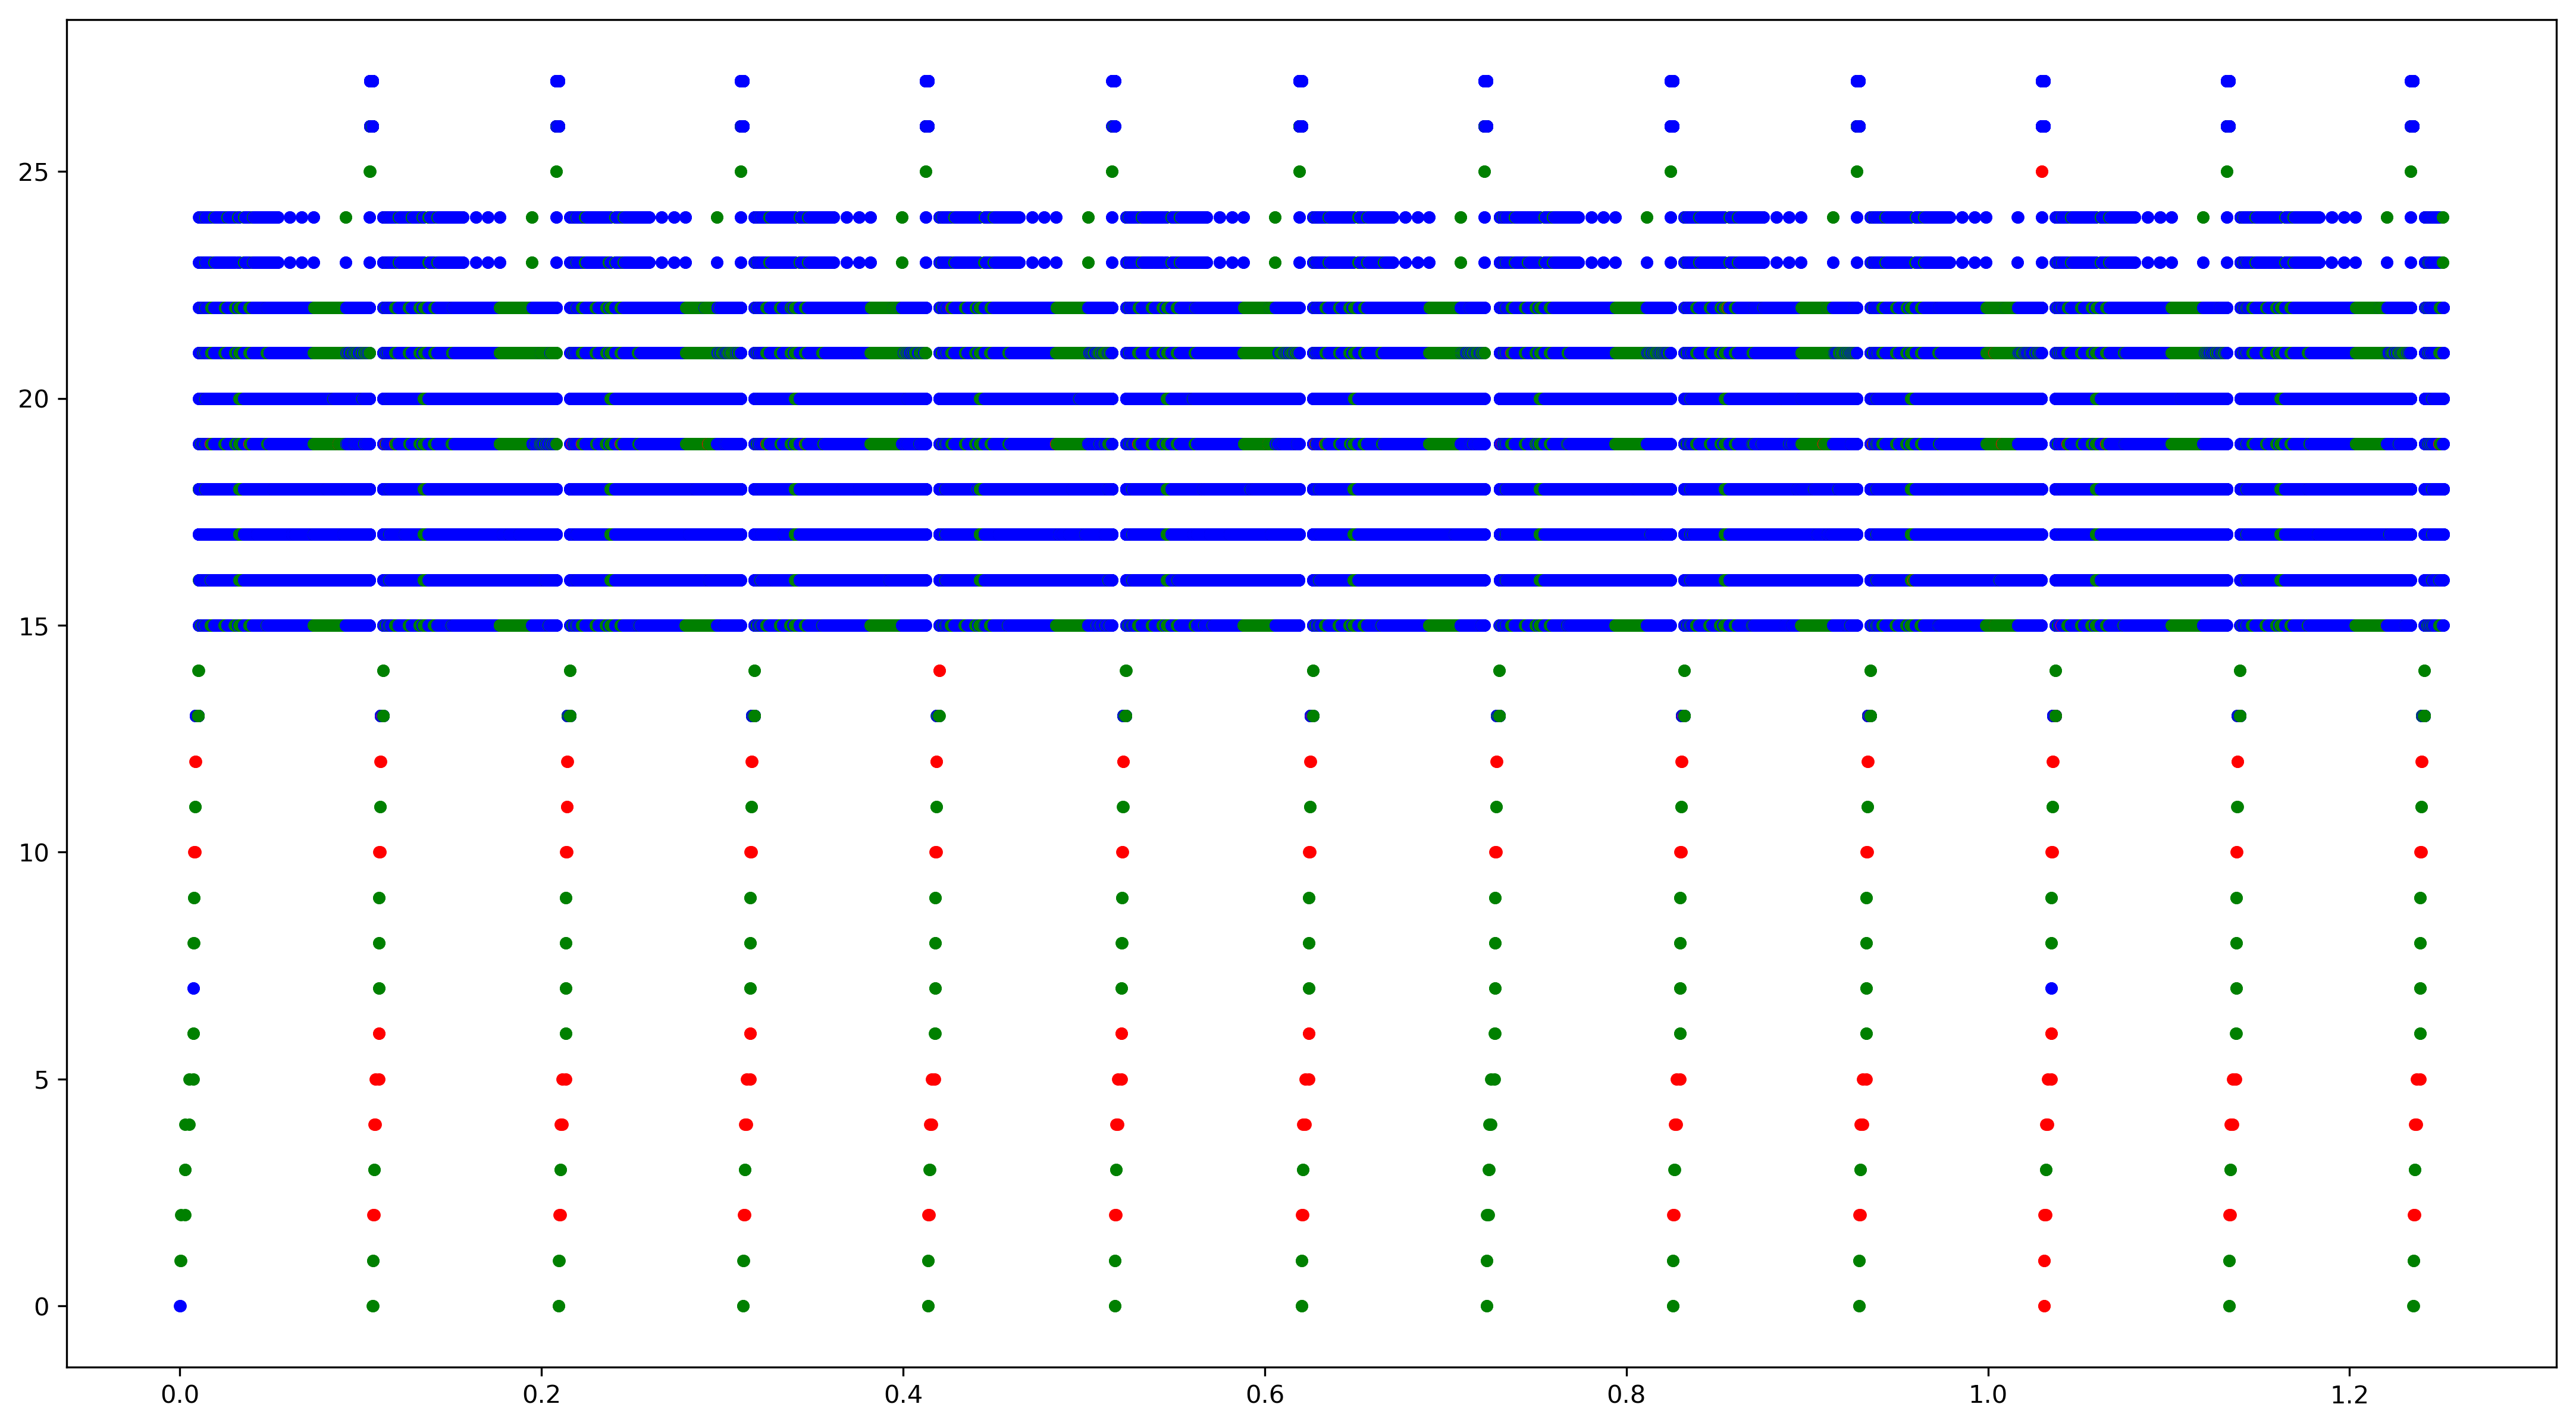

In [23]:
%%time
# Now that we have the necessary columns, let's plot the data
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18, 10)
fig1.set_dpi(300)

for index, row in mins.iterrows():
    mycolor, mylabel = policies_map[row.policy]
    ax1.plot([row.x_start, row.x_end], [row.y, row.y], color=mycolor, label=mylabel, marker='o', markersize=4)
    if (index % 1000) == 0:
        print('current index: ', index, '(', 100*(index+1)/mins.shape[0] ,')')
    
print(region_map.keys())

ax1.set_title(target_path)
#ax1.set_yticklabels(regions)
ax1.set_yticks(list(region_map.values()))
ax1.set_yticklabels(list(region_map.keys()))
ax1.set_xlabel('Percent XTime')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.15))